In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom

def apply_sobel(image_path):
    # Load the image
    # image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = image_path

    # Check if image is loaded
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Apply Sobel operator in the x direction
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3, scale=3, delta=10)
    
    # Apply Sobel operator in the y direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3, scale=3, delta=10)

    # Compute the magnitude of the gradient
    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Convert back to uint8
    sobel_magnitude = np.uint8(np.clip(sobel_magnitude, 0, 255))

    # Display the results
    plt.figure(figsize=(10, 8))
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Sobel X')
    plt.imshow(sobel_x, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Sobel Y')
    plt.imshow(sobel_y, cmap='gray')
    plt.axis('off')

    plt.figure(figsize=(5, 5))
    plt.title('Sobel Magnitude')
    plt.imshow(sobel_magnitude, cmap='gray')
    plt.axis('off')

    plt.show()

In [ ]:
# Example usage
image_path = 'path_to_your_image.jpg'  # Replace with your image path
apply_sobel(image_path)

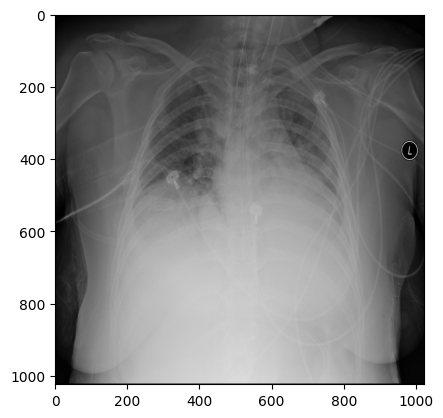

In [5]:
# Read the DICOM file from any of the rsna set
dcm_file_path = 'rsna-pneumonia-detection-challenge/stage_2_train_images/00436515-870c-4b36-a041-de91049b9ab4.dcm'
dicom = pydicom.dcmread(dcm_file_path)

# Convert to 3-channel RGB image if needed by SAM
image = dicom.pixel_array
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
plt.imshow(image_rgb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3026.0..3058.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3041.0..3061.0].


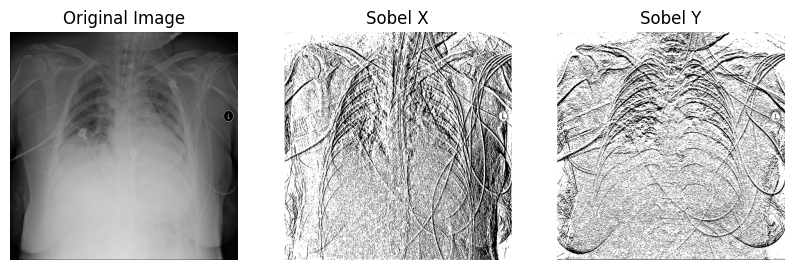

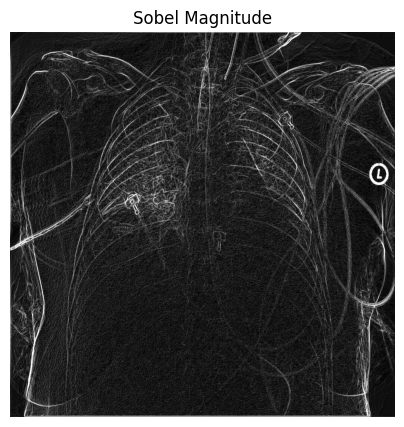

In [37]:
apply_sobel(image_rgb)